<a href="https://colab.research.google.com/github/derpen/MachineLearningStuff/blob/main/credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
# For collab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# CreditCards = pd.read_csv("cc.csv")
CreditCards = pd.read_csv("/content/drive/MyDrive/cc.csv") 
CreditCards

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
CreditCards.drop(labels="CUST_ID", axis=1, inplace=True) # just remove lmao

In [5]:
CreditCards.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [6]:
CreditCards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [7]:
CreditCards.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
CreditCards.dropna(subset=['CREDIT_LIMIT'], inplace=True) # Karena cuma 1 yang na, buang aja

In [9]:
CreditCards['MINIMUM_PAYMENTS'].fillna(CreditCards['MINIMUM_PAYMENTS'].median(), inplace=True) # isi dengan median, can try with mean later

In [10]:
CreditCards.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f63285b18d0>,
      dtype=object)

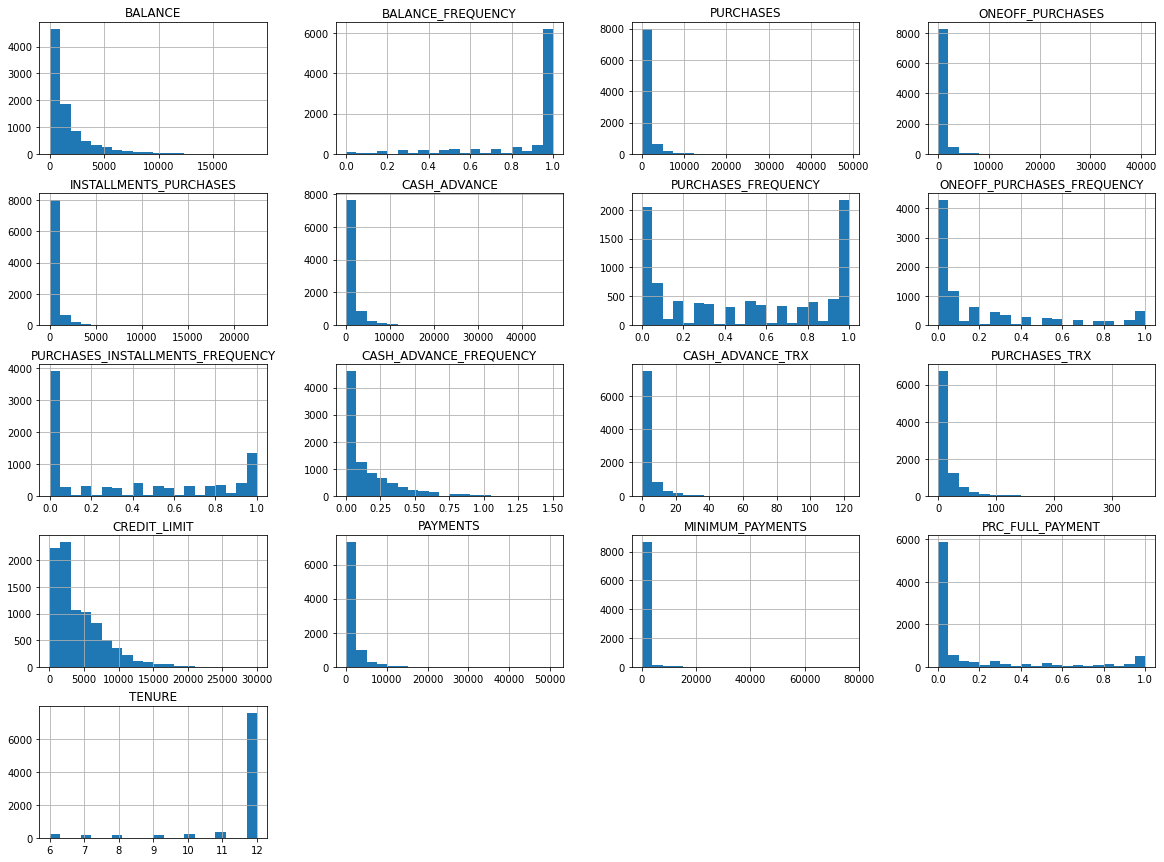

In [11]:
col = list(CreditCards.columns)
CreditCards.hist(bins=20, figsize=(20, 15), layout=(5, 4)) # lets see the data

# Data terlalu skewed, ini berarti terdapat outlier. Dan pada kasus ini, jumlahnya cukup banyak

# Mengurus Outlier

# Jika tugas kita mendeteksi outlier
* outliernya ga usah diapa apain

# Kalau mau ngurus outlier, 3 cara
* Just delete it. Metode ini buruk kalau outlier nya terlalu banyak, karena akan membuang terlalu banyak data
* Ganti dengan median/mean/apalah. Simple dan efektif
* Buat Batas. Ex: nilai berapapun yang diatas 5.6 akan dirubah jadi 5.6. Butuh effort ekstra, tetapi akan membantu model nantinya

# Today, we will ignore outliers and see what happens

In [12]:
# Process the data
# X = np.asarray(CreditCards)

# Standardize the data, then normalize
X = CreditCards

scale = StandardScaler()
X = scale.fit_transform(X)

X = normalize(X)

# we reduce dimension to 2 with PCA to make things easier later
pca = PCA(2)
X = pca.fit_transform(X)

X.shape

(8949, 2)

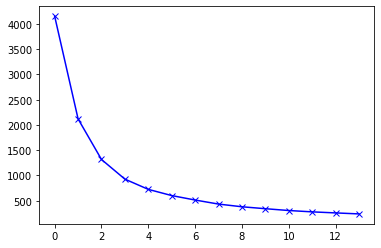

In [13]:
# K means for clustering
# this will take quite some time

n_clusters=15
cost=[]
for i in range(1,n_clusters):
    kmean = KMeans(i).fit(X)
    cost.append(kmean.inertia_)  
  
plt.plot(cost, 'bx-')

# 3 Cluster sepertinya paling optimal
## Bisa di cek menggunakan silhouette_score

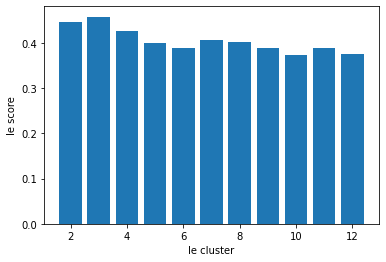

In [14]:
s_scores = []

for i in range(2,13):
  s_scores.append(
      silhouette_score(X, KMeans(n_clusters = i).fit_predict(X))
  )

label = [i for i in range(2,13)]
plt.bar(label, s_scores)
plt.xlabel('le cluster')
plt.ylabel('le score')
plt.show()

# We go with 3


In [15]:
kmean = KMeans(3).fit(X)
labels = kmean.labels_

In [16]:
# Add labels to original dataset
clusters=pd.concat([CreditCards, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head().T

,0,1,2,3,4
BALANCE,40.900749,3202.467416,2495.148862,1666.670542,817.714335
BALANCE_FREQUENCY,0.818182,0.909091,1.000000,0.636364,1.000000
PURCHASES,95.400000,0.000000,773.170000,1499.000000,16.000000
ONEOFF_PURCHASES,0.000000,0.000000,773.170000,1499.000000,16.000000
INSTALLMENTS_PURCHASES,95.400000,0.000000,0.000000,0.000000,0.000000
CASH_ADVANCE,0.000000,6442.945483,0.000000,205.788017,0.000000
PURCHASES_FREQUENCY,0.166667,0.000000,1.000000,0.083333,0.083333
ONEOFF_PURCHASES_FREQUENCY,0.000000,0.000000,1.000000,0.083333,0.083333
PURCHASES_INSTALLMENTS_FREQUENCY,0.083333,0.000000,0.000000,0.000000,0.000000
CASH_ADVANCE_FREQUENCY,0.000000,0.250000,0.000000,0.083333,0.000000


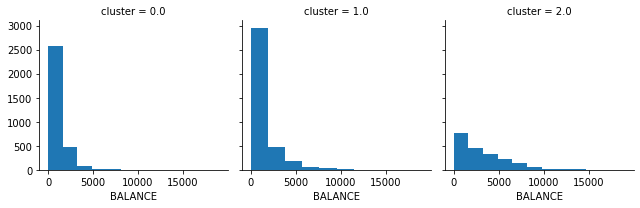

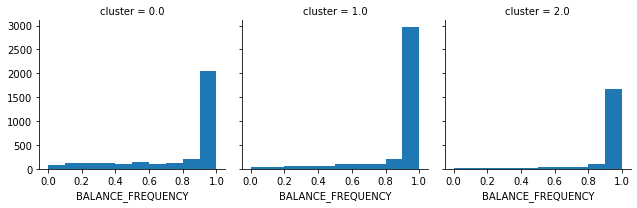

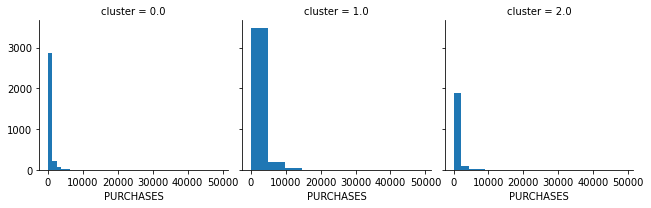

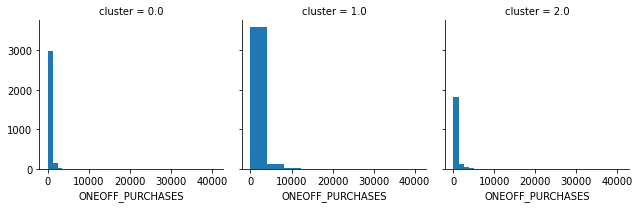

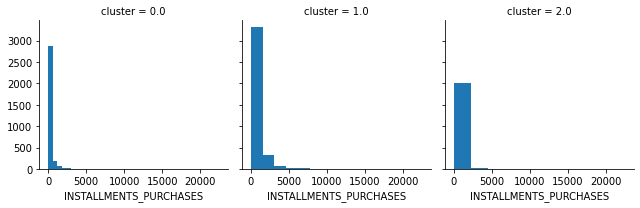

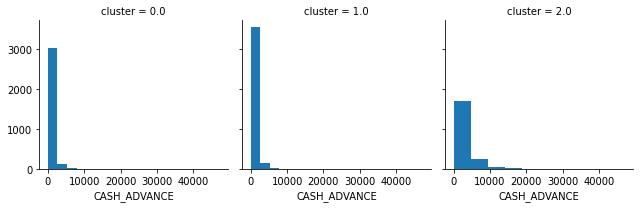

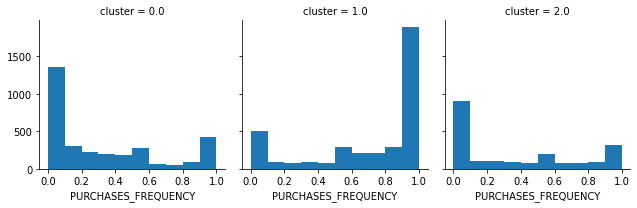

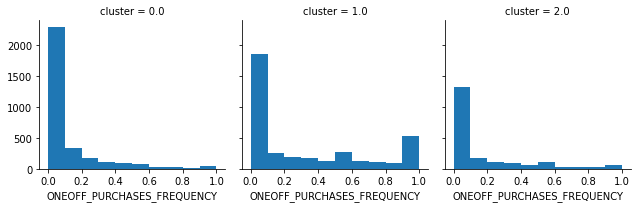

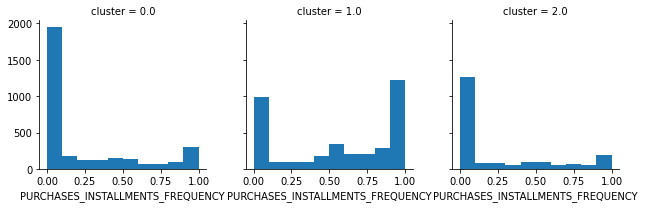

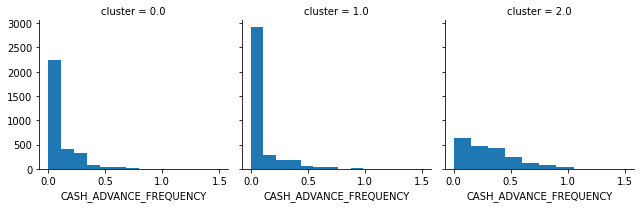

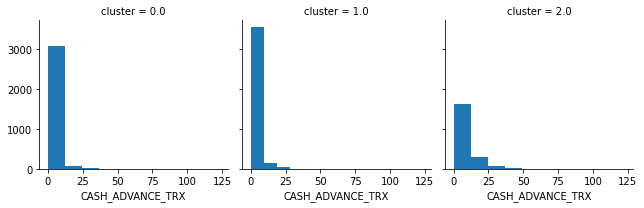

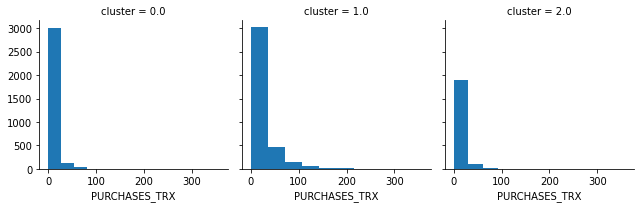

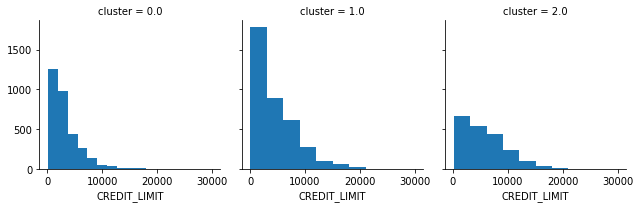

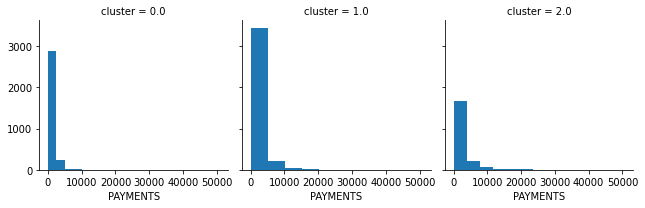

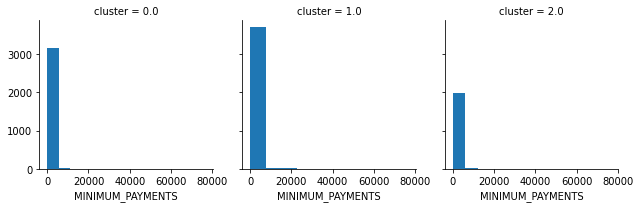

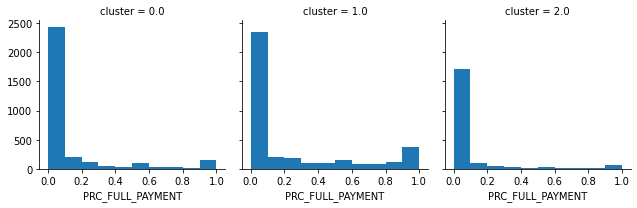

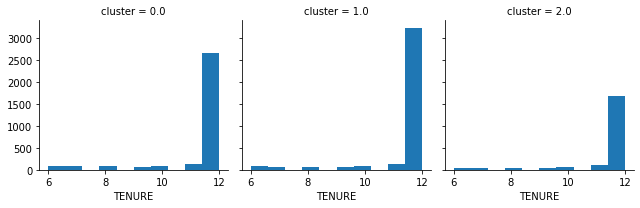

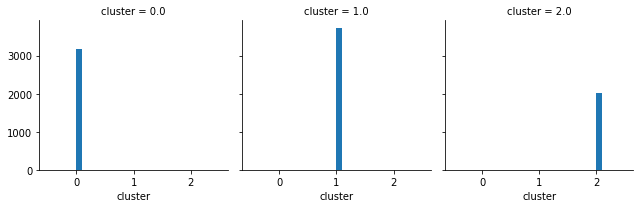

In [17]:
# See what each label means
for c in clusters:
    grid = sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

# Cluster ke 2 memiliki jumlah paling sedikit, bisa diasumsikan bahwa cluster 2 adalah outlier

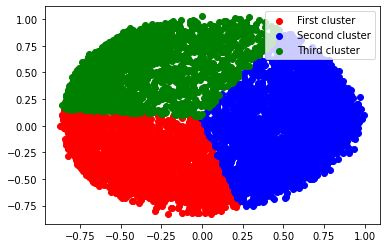

In [18]:
#Visualization

pca_result = pd.DataFrame(X)
pca_result.columns = ['D1', 'D2'] # add header, first pca dimension, and 2nd dimension

pca_result['Labels'] = labels # add cluster label as columns

grouped = pca_result.groupby("Labels") # group the labels

fig, ax = plt.subplots()

colors = { 0: 'red',
           1: 'blue',
           2: 'green'
        }

legend = { 0: "First cluster",
           1: "Second cluster",
           2: "Third cluster"
        }

for cluster, value in grouped:
    ax.scatter(value.D1, value.D2, 
               c = colors[cluster], 
               label = legend[cluster])

ax.legend()

plt.show() 

# Untuk Metric, bisa gunakan silhouette_score

In [19]:
print(silhouette_score(X, labels))

0.4579526341373324
